[sigmoid] weight: [-2.93276073  0.84868159], bias: 0.8750534172696945

Current weights: [-2.93276073  0.84868159], bias: 0.8750534172696945


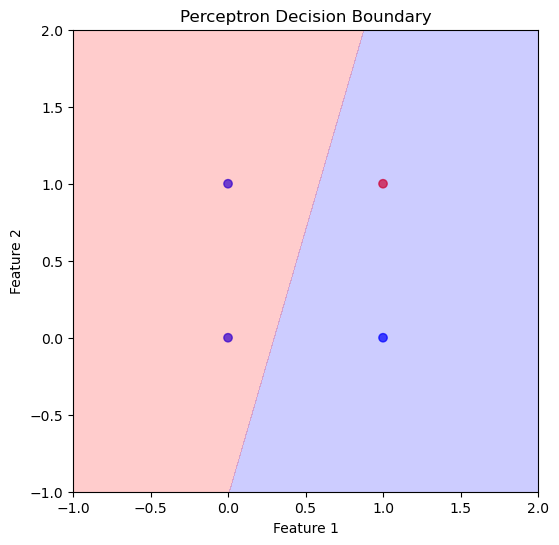

Options:
 1. Train more epochs
 2. Manually adjust weights and bias
 3. Plot sigmoid activation function
 4. Exit
Choose option (1/2/3/4): 3


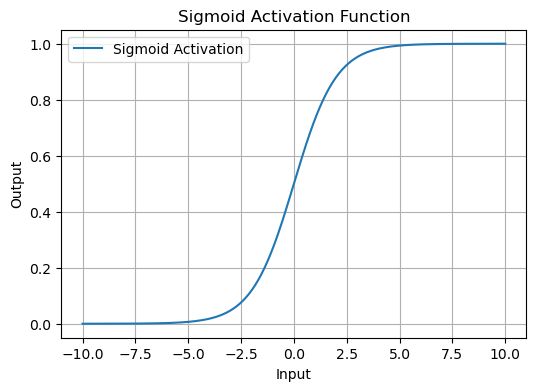


Current weights: [-2.93276073  0.84868159], bias: 0.8750534172696945


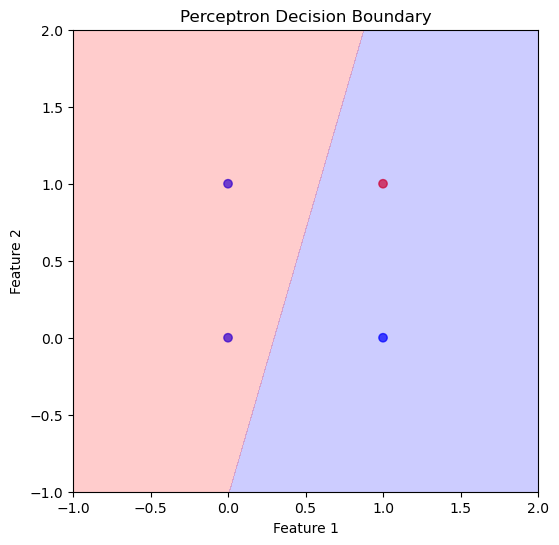

Options:
 1. Train more epochs
 2. Manually adjust weights and bias
 3. Plot sigmoid activation function
 4. Exit
Choose option (1/2/3/4): 1
Enter number of epochs to train: 5
Epoch 1/5 - Accuracy: 25.00%
Epoch 2/5 - Accuracy: 25.00%
Epoch 3/5 - Accuracy: 25.00%
Epoch 4/5 - Accuracy: 25.00%
Epoch 5/5 - Accuracy: 25.00%

Current weights: [-2.87080965  0.86047038], bias: 0.8079259363642701


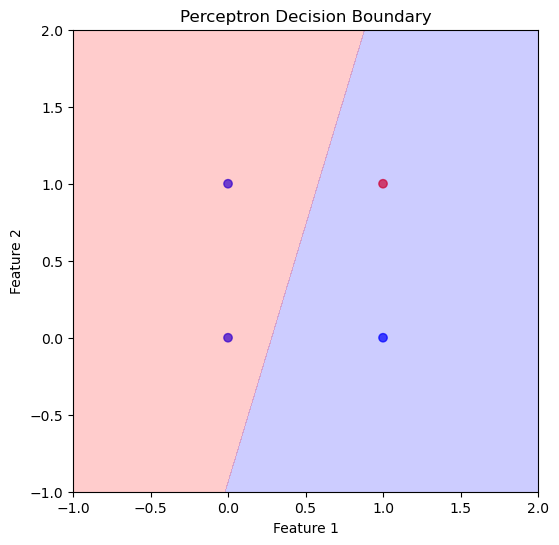

Options:
 1. Train more epochs
 2. Manually adjust weights and bias
 3. Plot sigmoid activation function
 4. Exit
Choose option (1/2/3/4): 2
Enter new weights as comma-separated floats (current: [-2.87080965  0.86047038]): 0.34, 4.56
Enter new bias as float (current: 0.8079259363642701): 0.234
Weights and bias updated to [0.34 4.56], 0.234

Current weights: [0.34 4.56], bias: 0.234


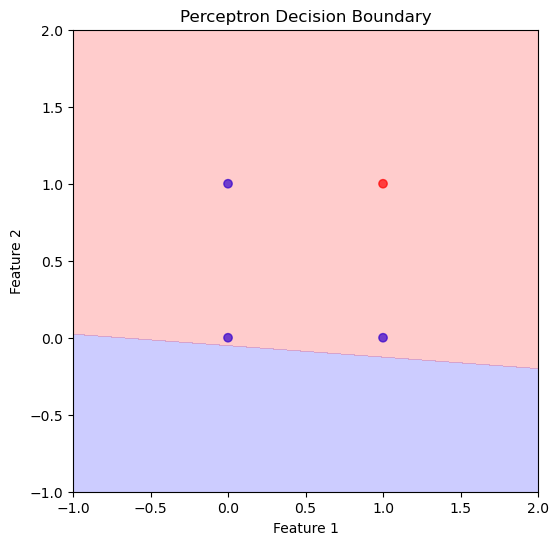

Options:
 1. Train more epochs
 2. Manually adjust weights and bias
 3. Plot sigmoid activation function
 4. Exit
Choose option (1/2/3/4): 4
Exiting interactive training.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, activation='sigmoid', input_size=2, learning_rate=0.1):
        self.weight = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        
        if activation == 'sigmoid':
            self.activation = self.sigmoid
            self.activation_derivative = self.sigmoid_derivative
        else:
            raise ValueError("Currently only 'sigmoid' activation supported")
        
        print(f"[{activation}] weight: {self.weight}, bias: {self.bias}")

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def predict(self, x):
        z = np.dot(x, self.weight) + self.bias
        a = self.activation(z)
        return 1 if a >= 0.5 else 0

    def predict_prob(self, x):
        z = np.dot(x, self.weight) + self.bias
        return self.activation(z)
    
    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for i, x_i in enumerate(X):
                z = np.dot(x_i, self.weight) + self.bias
                a = self.activation(z)
                error = y[i] - a
                self.weight += self.learning_rate * error * self.activation_derivative(z) * x_i
                self.bias += self.learning_rate * error * self.activation_derivative(z)
            predictions = [self.predict(x) for x in X]
            accuracy = np.mean(predictions == y)
            print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy*100:.2f}%")
    
    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(6,6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
        
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = np.array([self.predict_prob(p) for p in grid])
        probs = probs.reshape(xx.shape)
        
        plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
        plt.title("Perceptron Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()
    
    def plot_sigmoid(self):
        x = np.linspace(-10, 10, 400)
        y = self.sigmoid(x)
        plt.figure(figsize=(6,4))
        plt.plot(x, y, label='Sigmoid Activation')
        plt.title("Sigmoid Activation Function")
        plt.xlabel("Input")
        plt.ylabel("Output")
        plt.grid(True)
        plt.legend()
        plt.show()

def interactive_training():
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([0, 0, 0, 1])

    p = Perceptron(input_size=2, learning_rate=0.1)

    while True:
        print(f"\nCurrent weights: {p.weight}, bias: {p.bias}")
        p.plot_decision_boundary(X, y)
        print("Options:")
        print(" 1. Train more epochs")
        print(" 2. Manually adjust weights and bias")
        print(" 3. Plot sigmoid activation function")
        print(" 4. Exit")
        choice = input("Choose option (1/2/3/4): ").strip()

        if choice == '1':
            epochs_str = input("Enter number of epochs to train: ").strip()
            if epochs_str.isdigit():
                epochs = int(epochs_str)
                p.train(X, y, epochs=epochs)
            else:
                print("Invalid input. Please enter a positive integer.")
        elif choice == '2':
            w_input = input(f"Enter new weights as comma-separated floats (current: {p.weight}): ").strip()
            b_input = input(f"Enter new bias as float (current: {p.bias}): ").strip()
            try:
                new_weights = np.array([float(x) for x in w_input.split(',')])
                if new_weights.shape != p.weight.shape:
                    print(f"Error: Expected {p.weight.shape[0]} weights.")
                    continue
                new_bias = float(b_input)
                p.weight = new_weights
                p.bias = new_bias
                print(f"Weights and bias updated to {p.weight}, {p.bias}")
            except ValueError:
                print("Invalid format for weights or bias. Please enter numbers correctly.")
        elif choice == '3':
            p.plot_sigmoid()
        elif choice == '4':
            print("Exiting interactive training.")
            break
        else:
            print("Invalid option, please choose 1, 2, 3, or 4.")

if __name__ == "__main__":
    interactive_training()
